In [213]:
# einige Bibs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from random import randint
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [214]:
# Main values for trial
x_wert   = 0.2
z_wert   = 0.5
x_label = "X"
y_label = "Y"
z_label = "Z"

# Datengenerierung 
mdays     = 200
mproducts = 15000
mmaxsale  = 15000
mshuffle  = True #different sale per product

In [215]:
def make_forcast( days, products, maxsale, shuffle ):
    # try to generate random sales so that we have x,y,z cases
    sales = []
    sales = np.zeros((products,days), dtype=int)

    for pro in range( products ):
        # create empty array 
        timeline = []
        timeline = np.zeros(days)
        # sample how many values we should find
        # random limit
        #repl = randint( int(days *.8), days)
        repl = days

        #shuffle sale value per product    
        if shuffle:
            s_val = randint( int( maxsale * .05 ), maxsale)
        else:
            s_val = maxsale

        # 1 more X
        # 2 more Y
        # 3 more balance x,y
        # 4 more Z
        mode = randint( 1, 4)
        if mode == 1:
            low_lim = 0.85
        elif mode == 2:
            low_lim = 0.35
        elif mode == 3:
            low_lim = 0.45
        else:
            low_lim = 0.00001

        for i in range( repl ):
            #idx = randint(0, days-1)
            idx = i
            sales[pro][idx] += randint( int( s_val * low_lim ), s_val)
    return sales

def get_cla( koeffizient ):
    if koeffizient <= x_wert:
        mycla = x_label
    elif koeffizient > z_wert:
        mycla = z_label
    else:
        mycla = y_label
    return mycla

def calc_koef( myval ):
    mystd = np.std( myval )
    myavg = np.mean( myval )
    mykoef = 0.0
    if mystd > 0 and myavg > 0:        
        mykoef = mystd /myavg
    return mykoef
# cnt error

def cnt_err():
    maxele = len( X_test )
    wrong = 0
    for idx in range(maxele):
        y_pred = clf.predict( [X_test[idx]] )
        #print( le.inverse_transform( y_pred ), le.inverse_transform( y_test[idx] ) )
        if y_pred  != y_test[idx]:
            wrong += 1
    err_rate = wrong * 100 / maxele
    
    return err_rate

def print_err():
    print( "Error rate:", cnt_err(), "%" )
    
# calculate the y-label classification
def calc_classification( mpro, s_tab):    
    y_lab = np.chararray(mpro)
    for pro in range(mpro):
        mykoef = calc_koef( s_tab[pro] )
        #print( sales[pro], mykoef, get_cla( mykoef ))
        y_lab[pro] = get_cla( mykoef )        
    return y_lab

In [216]:
# generate forcast
sales = make_forcast( mdays, mproducts, mmaxsale, mshuffle )
y = calc_classification( mproducts, sales )
Counter( y )

Counter({b'X': 3789, b'Y': 7484, b'Z': 3727})

In [217]:
# filter according classification
x_sales = []
ins = 0
for idx in range(mproducts):
    label = y[idx].decode()
    if  label == str(x_label):
        x_sales = np.append([sales[idx]], x_sales )
        ins +=1
        
# shape to be for each product        
x_sales = x_sales.reshape(ins,mdays)

In [218]:
# label is taken directly from forcast

y_tot = x_sales[:,mdays-3:]
y = x_sales[:,mdays-3:mdays-2]   # y label is last column
X = x_sales[:,:mdays-3]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

In [219]:
# try Ridge Regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, solver="cholesky" ).fit(X_train, y_train)


In [220]:
# y_pred = clf.predict(X_test)
# for i in range(len(y_pred)):
#     mykoef = calc_koef( X_test[i] )
#     print( get_cla( mykoef )    )
#     print( X_test[i].mean() )    
#     print( y_test[i].mean() )
#     print( y_pred[i] ) 
#     print()

In [221]:
# shift forcast for half the element's and append prediction
X_new = X_test
day2predict = int( len(X_test[0]) * 7 / 8 )
for i in range( day2predict ):    
    y_pred = clf.predict(X_new)
    X_new = np.append(X_new, y_pred, axis=1 )[:,1:]        

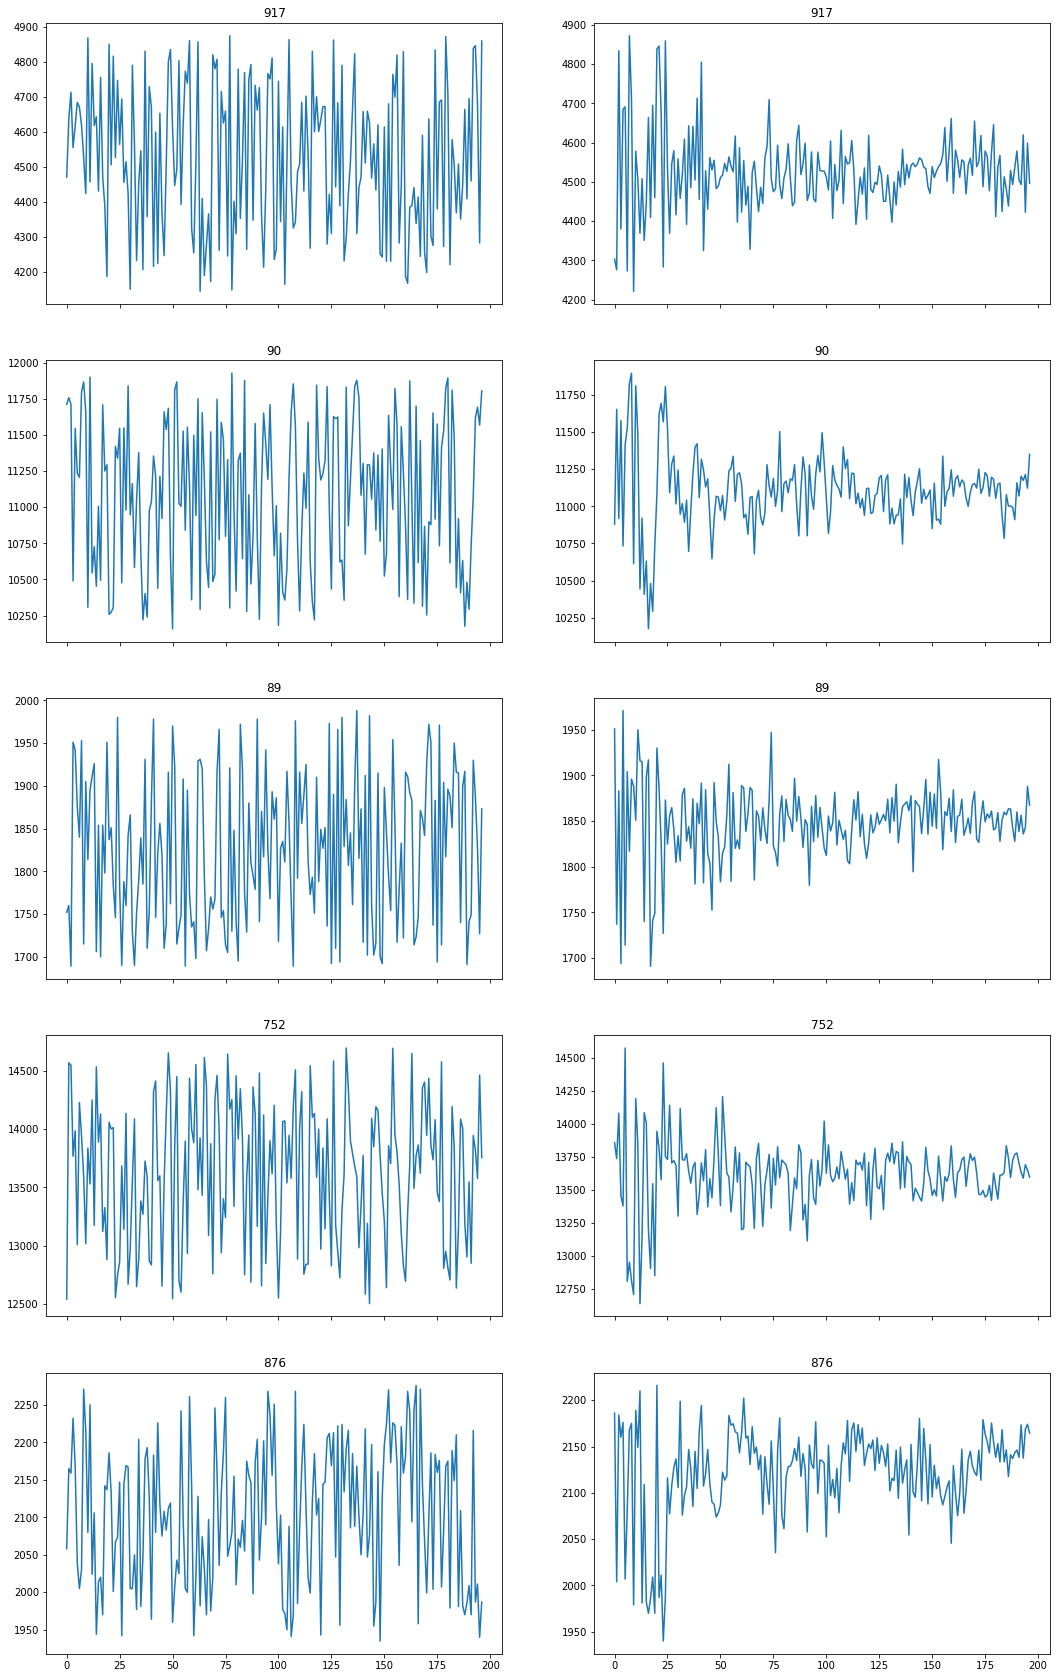

In [222]:
#show test with prediction

# product to compare
p2c = 5#10

fig, axes = plt.subplots(p2c, 2, sharex='col')
fig.set_size_inches(18, int(p2c * 6) )


pro_nr = len(X_new[:,1]) # count of products

#generate by random plot train/test/prediction
for i in range(p2c):
    p_n = randint(0,(pro_nr-1))    
    axes[i,0].set_title(p_n)
    axes[i,0].plot(X_test[p_n])    
    axes[i,1].set_title(p_n)
    axes[i,1].plot(X_new[p_n])
    